In [21]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [22]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
#normalization
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=5)

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

In [ ]:
predictions = model.predict(test_images)

for i in range(5):
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel("Gerçek: " + str(test_labels[i]))
    plt.title("Tahmin: " + str(predictions[i].argmax()))
    plt.show()

Epoch 1/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.1460 - accuracy: 0.9548 - val_loss: 0.0415 - val_accuracy: 0.9860
Epoch 2/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0483 - accuracy: 0.9849 - val_loss: 0.0283 - val_accuracy: 0.9903
Epoch 3/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0329 - accuracy: 0.9895 - val_loss: 0.0272 - val_accuracy: 0.9911
Epoch 4/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0275 - accuracy: 0.9914 - val_loss: 0.0263 - val_accuracy: 0.9916
Epoch 5/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0216 - accuracy: 0.9933 - val_loss: 0.0287 - val_accuracy: 0.9924
313/313 - 2s - loss: 0.0287 - accuracy: 0.9924 - 2s/epoch - 7ms/step

Test accuracy: 0.9923999905586243


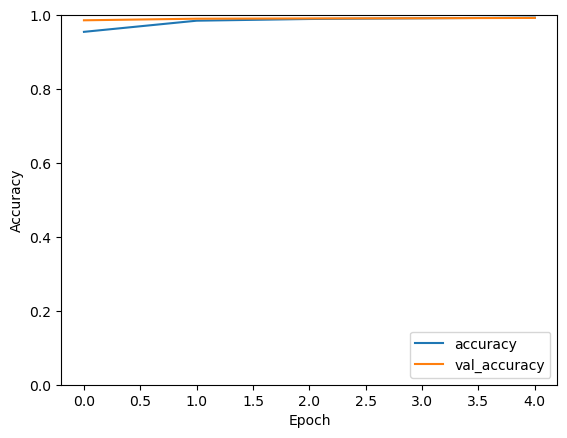

In [23]:
train_images, test_images = train_images / 255.0, test_images / 255.0

cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = cnn_model.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels))

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()